In [1]:
import scanpy as sc
import os

In [2]:
adata = sc.read("../../../../data/adata_pancreas_2019.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 20519 × 16206
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion'
    uns: 'clusters_fig6_fine_final_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [7]:
adata.obs["celltype"].cat.categories

Index(['Multipotent', 'Tip', 'Acinar', 'Trunk', 'Ductal', 'Ngn3 low EP',
       'Ngn3 High early', 'Ngn3 High late', 'Fev+ Beta', 'Beta', 'Fev+ Alpha',
       'Alpha', 'Fev+ Pyy', 'Fev+ Delta', 'Fev+ Epsilon', 'Delta', 'Epsilon'],
      dtype='object')

In [24]:
adata_endocrine = adata[~adata.obs["celltype"].isin(["Acinar", "Ductal", "Tip", "Trunk", "Multipotent", "Ngn3 low EP"])]

In [25]:
sc.pp.highly_variable_genes(adata_endocrine, subset=True)

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:540: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}


In [26]:
adata_endocrine.shape

(6093, 1817)

In [27]:
sc.pp.pca(adata_endocrine)

In [28]:
sc.pp.neighbors(adata_endocrine)

In [29]:
sc.tl.umap(adata_endocrine)

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


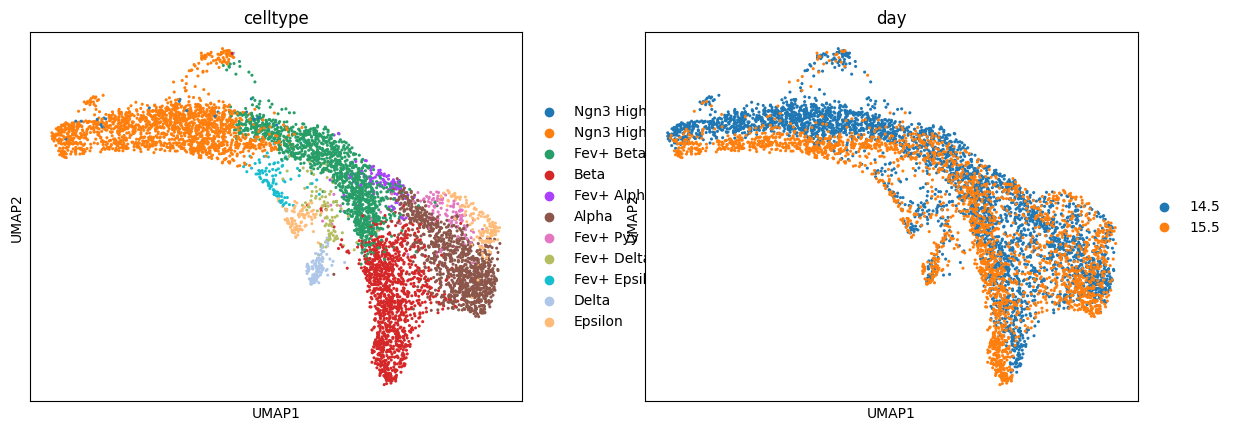

In [30]:
sc.pl.umap(adata_endocrine, color=["celltype", "day"])

In [31]:
adata.write("../../../../data/adata_pancreas_2019_processed.h5ad")